In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-dataset/walmart.csv


**The datset contains the following columns:**

    User_ID: User ID
    Product_ID: Product ID
    Gender: Sex of User
    Age: Age in bins
    Occupation: Occupation(Masked)
    City_Category: Category of the City (A,B,C)
    StayInCurrentCityYears: Number of years stay in current city
    Marital_Status: Marital Status
    ProductCategory: Product Category (Masked)
    Purchase: Purchase Amount


**DATASET**: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/kaggle/input/walmart-sales-dataset/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: >

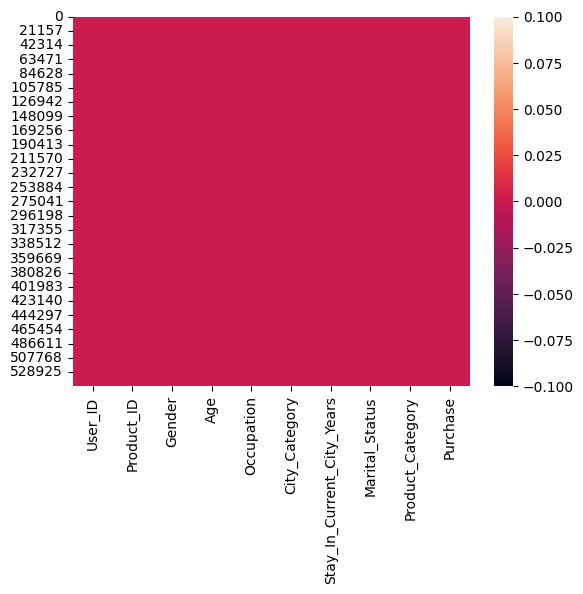

In [13]:
sns.heatmap(df.isnull())

In [16]:
df.Product_Category.value_counts().sort_values(ascending=True)

Product_Category
9        410
17       578
14      1523
19      1603
20      2550
18      3125
7       3721
12      3947
10      5125
13      5549
15      6290
16      9828
4      11753
3      20213
6      20466
2      23864
11     24287
8     113925
1     140378
5     150933
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Product_Category', ylabel='Count'>

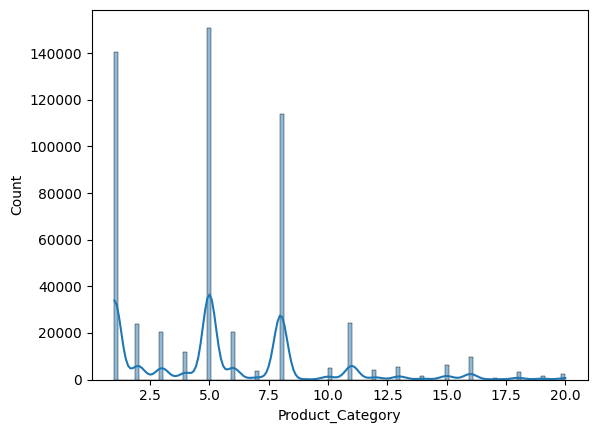

In [54]:
sns.histplot(data=df, x=df.Product_Category, kde=True)

In [25]:
df.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [26]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [31]:
df.groupby(['Gender', 'Marital_Status']).size()

Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
dtype: int64

In [38]:
df.addcolumns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [43]:
df.Occupation.value_counts().head()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
Name: count, dtype: int64

In [44]:
df.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

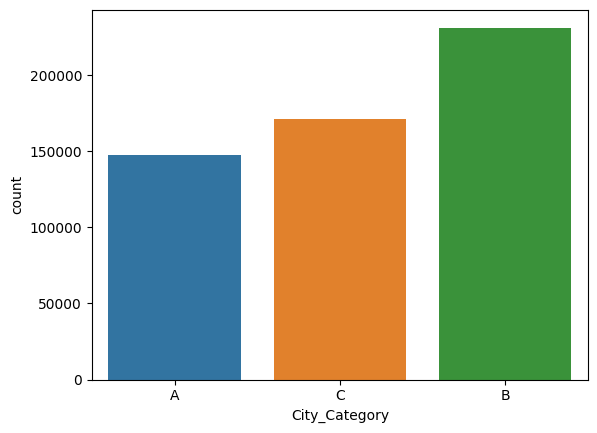

In [56]:
sns.countplot(data=df,x='City_Category')

In [57]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [60]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

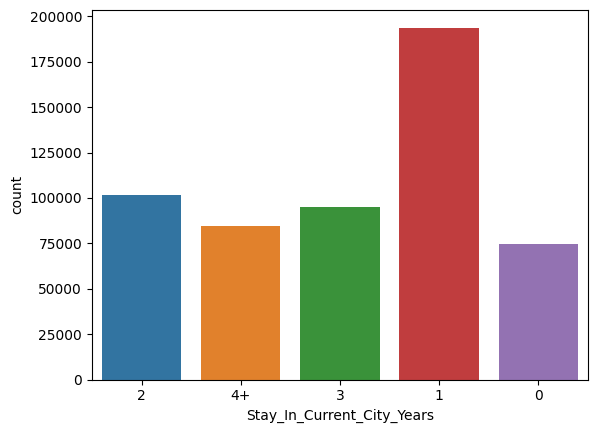

In [62]:
sns.countplot(data=df, x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Age', ylabel='count'>

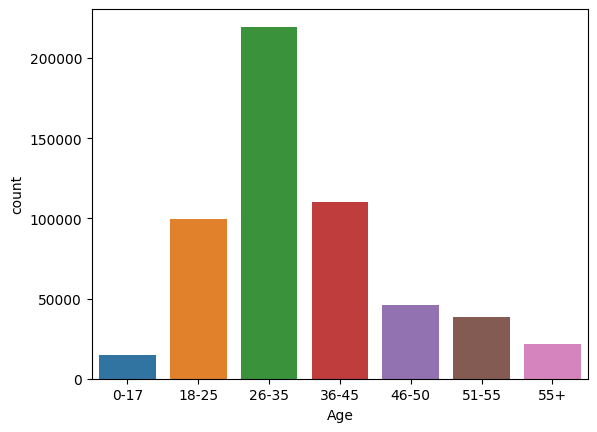

In [67]:
sns.countplot(data=df, x=df.Age.sort_values())